<a href="https://colab.research.google.com/github/amyylin1/machine-learning/blob/main/01_ml_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear regression?


In [51]:
# import denpendencies
import pandas            as pd
import matplotlib.pyplot as plt
import sklearn.linear_model



In [52]:
# load your file
clean_df2 = pd.read_csv('clean.csv')
clean_df2.head()

,Unnamed: 0,Unique ID,Household region,Age of sample adult,Sex of sample adult,Education of sample adult,Hispanic ethnicity of SA,Single + Mult race gps w Hispanic origin,Hispanic origin detail,Single and multiple race groups,...,Medicaid HDHP.1,Medicaid reassignment flag,Paid for by Medicare - plan 1,Paid for by Medicare - plan 2,"Not eligible for Medicaid, CHIP, or other public coverage",SA family poverty ratio,Ratio of family income to poverty threshold for SA’s family,income from wages,income from SSI SSDI,income from retirement
0,0,H056808,3,50,1,1,2,2,3,1,...,NaN,NaN,2.0,NaN,NaN,1.93,7,1,2.0,2.0
1,1,H018779,3,53,1,7,2,3,3,2,...,NaN,NaN,2.0,NaN,NaN,4.45,12,1,2.0,2.0
2,2,H049265,3,56,1,8,2,2,3,1,...,NaN,NaN,2.0,NaN,NaN,5.94,14,1,2.0,2.0
3,3,H007699,3,57,2,5,2,2,3,1,...,NaN,NaN,NaN,NaN,NaN,3.70,11,1,1.0,1.0
4,4,H066034,3,25,1,4,2,3,3,2,...,NaN,NaN,2.0,NaN,NaN,1.66,6,8,NaN,NaN


In [53]:
# a new df
clean_bmi = clean_df2.loc [ :, ['Taking diabetic pills', 'Categorical Body Mass Index'] ]
clean_bmi

,Taking diabetic pills,Categorical Body Mass Index
0,1.0,3
1,1.0,3
2,NaN,3
3,NaN,4
4,NaN,4
...,...,...
29477,NaN,3
29478,1.0,4
29479,NaN,3
29480,NaN,2


In [54]:
# drop na
clean_bmi1 = clean_bmi.dropna()
clean_bmi1

,Taking diabetic pills,Categorical Body Mass Index
0,1.0,3
1,1.0,3
8,2.0,4
12,1.0,4
15,2.0,4
...,...,...
29470,1.0,4
29473,1.0,4
29476,1.0,3
29478,1.0,4


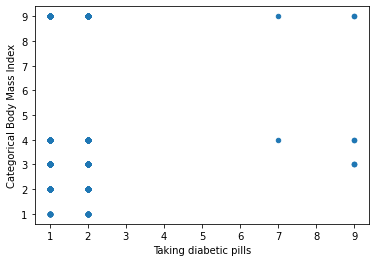

In [55]:
# visualize
clean_bmi1.plot(x='Taking diabetic pills', y='Categorical Body Mass Index', kind='scatter')

Does not work ...

In [56]:
# convert categorical variables into indicators
clean_bmi2 = pd.get_dummies(clean_bmi1, columns=['Taking diabetic pills', 
                                                 'Categorical Body Mass Index'])
clean_bmi2

,Taking diabetic pills_1.0,Taking diabetic pills_2.0,Taking diabetic pills_7.0,Taking diabetic pills_9.0,Categorical Body Mass Index_1,Categorical Body Mass Index_2,Categorical Body Mass Index_3,Categorical Body Mass Index_4,Categorical Body Mass Index_9
0,1,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,1,0,0
8,0,1,0,0,0,0,0,1,0
12,1,0,0,0,0,0,0,1,0
15,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
29470,1,0,0,0,0,0,0,1,0
29473,1,0,0,0,0,0,0,1,0
29476,1,0,0,0,0,0,1,0,0
29478,1,0,0,0,0,0,0,1,0


In [57]:
# drop unnecessary cols
clean_bmi3 = clean_bmi2.drop( columns={ 'Taking diabetic pills_2.0', 
                                      'Taking diabetic pills_7.0',
                                      'Taking diabetic pills_9.0',
                                       'Categorical Body Mass Index_9' } )
clean_bmi3
                                

,Taking diabetic pills_1.0,Categorical Body Mass Index_1,Categorical Body Mass Index_2,Categorical Body Mass Index_3,Categorical Body Mass Index_4
0,1,0,0,1,0
1,1,0,0,1,0
8,0,0,0,0,1
12,1,0,0,0,1
15,0,0,0,0,1
...,...,...,...,...,...
29470,1,0,0,0,1
29473,1,0,0,0,1
29476,1,0,0,1,0
29478,1,0,0,0,1


In [58]:
clean_bmi4 = clean_bmi3.rename( columns ={ 'Categorical Body Mass Index_1' : 'Underweight',
                                          'Categorical Body Mass Index_2' : 'Healthy weight',
                                          'Categorical Body Mass Index_3' : 'Overweight',
                                          'Categorical Body Mass Index_4' : 'Obese' } )
clean_bmi4

,Taking diabetic pills_1.0,Underweight,Healthy weight,Overweight,Obese
0,1,0,0,1,0
1,1,0,0,1,0
8,0,0,0,0,1
12,1,0,0,0,1
15,0,0,0,0,1
...,...,...,...,...,...
29470,1,0,0,0,1
29473,1,0,0,0,1
29476,1,0,0,1,0
29478,1,0,0,0,1


In [59]:
# features
X = clean_bmi4.drop ( columns=['Taking diabetic pills_1.0'] )
X.head()

,Underweight,Healthy weight,Overweight,Obese
0,0,0,1,0
1,0,0,1,0
8,0,0,0,1
12,0,0,0,1
15,0,0,0,1


In [60]:
# target
y = clean_bmi4['Taking diabetic pills_1.0']
y [:5]

0     1
1     1
8     0
12    1
15    0
Name: Taking diabetic pills_1.0, dtype: uint8

In [61]:
# select a linear model
